In [1]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 250, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 3095 (delta 102), reused 197 (delta 64), pack-reused 2845
Receiving objects: 100% (3095/3095), 573.01 MiB | 45.90 MiB/s, done.
Resolving deltas: 100% (1206/1206), done.
Checking out files: 100% (891/891), done.


In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Upload kaggle API key file
uploaded = files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [0]:
!unzip '/content/chest-xray-pneumonia.zip'

In [0]:
import pandas as pd
import os
import shutil

In [0]:
#Create the data for positive samples 

FILE_PATH = "/content/covid-chestxray-dataset/metadata.csv"
IMAGE_PATH = "/content/covid-chestxray-dataset/images"
df = pd.read_csv(FILE_PATH)
df.shape

In [0]:
!mkdir '/content/COVID'

In [0]:
TARGET_DIR = '/content/COVID/'

In [0]:
#Copy COVID-19 images with view point PA from Downloaded directory to Target Directory
cnt = 0
for(i,row) in df.iterrows():
    if 'row["finding"] == "COVID-19"' and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
       # print("Moving Image",cnt)
        cnt+=1
print(cnt)

In [0]:
!mkdir '/content/Normal'

In [0]:
import random
from glob import glob
KAGGLE_FILE_PATH = "/content/chest_xray/train/NORMAL"
TARGET_NORMAL_DIR = "/content/Normal"    
image_names = os.listdir(KAGGLE_FILE_PATH) #COntains list of all image names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(len(glob('/content/COVID/*'))):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
#     print("Moved",i)

In [0]:
!mkdir '/content/IMAGES'

In [12]:
shutil.move('/content/COVID','/content/IMAGES/COVID')

'/content/IMAGES/COVID'

In [13]:
shutil.move('/content/Normal','/content/IMAGES/Normal')

'/content/IMAGES/Normal'

In [0]:
# import the necessary packages
import os

# initialize the path to the *original* input directory of images
ORIG_INPUT_DATASET = "/content/IMAGES"

# initialize the base path to the *new* directory that will contain
# our images after computing the training and testing split
BASE_PATH = "/content"

# derive the training, validation, and testing directories
TRAIN_PATH = os.path.sep.join([BASE_PATH, "training"])
VAL_PATH = os.path.sep.join([BASE_PATH, "validation"])
TEST_PATH = os.path.sep.join([BASE_PATH, "testing"])

# define the amount of data that will be used training
TRAIN_SPLIT = 0.8

# the amount of validation data will be a percentage of the
# *training* data
VAL_SPLIT = 0.1

In [0]:
# import the necessary packages
from imutils import paths
import random
import shutil
import os

# grab the paths to all input images in the original input directory
# and shuffle them
imagePaths = list(paths.list_images(ORIG_INPUT_DATASET))
random.seed(42)
random.shuffle(imagePaths)

# compute the training and testing split
i = int(len(imagePaths) *TRAIN_SPLIT)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]

# we'll be using part of the training data for validation
i = int(len(trainPaths) *VAL_SPLIT)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

# define the datasets that we'll be building
datasets = [
	("training", trainPaths,TRAIN_PATH),
	("validation", valPaths,VAL_PATH),
	("testing", testPaths,TEST_PATH)
]

# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
	# show which data split we are creating
	print("[INFO] building '{}' split".format(dType))

	# if the output base output directory does not exist, create it
	if not os.path.exists(baseOutput):
		print("[INFO] 'creating {}' directory".format(baseOutput))
		os.makedirs(baseOutput)

	# loop over the input image paths
	for inputPath in imagePaths:
		# extract the filename of the input image along with its
		# corresponding class label
		filename = inputPath.split(os.path.sep)[-1]
		label = inputPath.split(os.path.sep)[-2]

		# build the path to the label directory
		labelPath = os.path.sep.join([baseOutput, label])

		# if the label output directory does not exist, create it
		if not os.path.exists(labelPath):
			print("[INFO] 'creating {}' directory".format(labelPath))
			os.makedirs(labelPath)

		# construct the path to the destination image and then copy
		# the image itself
		p = os.path.sep.join([labelPath, filename])
		shutil.copy2(inputPath, p)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [0]:
model.summary()

In [0]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [20]:
train_generator = train_datagen.flow_from_directory(
    '/content/training',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 429 images belonging to 2 classes.


In [21]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1}

In [22]:
validation_generator = train_datagen.flow_from_directory(
    '/content/testing',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [23]:
test_generator = test_dataset.flow_from_directory(
    '/content/validation',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 47 images belonging to 2 classes.


In [24]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 13s 2s/step - loss: 1.1539 - accuracy: 0.4895 - val_loss: 0.6930 - val_accuracy: 0.4844
Epoch 2/10
8/8 [==============================] - 7s 853ms/step - loss: 0.6915 - accuracy: 0.5485 - val_loss: 0.6902 - val_accuracy: 0.5714
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.6829 - accuracy: 0.5234 - val_loss: 0.6778 - val_accuracy: 0.8750
Epoch 4/10
8/8 [==============================] - 8s 994ms/step - loss: 0.6133 - accuracy: 0.6797 - val_loss: 0.6174 - val_accuracy: 0.8750
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.5251 - accuracy: 0.7553 - val_loss: 0.5505 - val_accuracy: 0.7812
Epoch 6/10
8/8 [==============================] - 8s 996ms/step - loss: 0.4266 - accuracy: 0.8203 - val_loss: 0.4424 - val_accuracy: 0.9107
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.3403 - accuracy: 0.8734 - val_loss: 0.3539 - val_accuracy: 0.8594
Epoch 8/10
8/8 [============

In [0]:
model.save("Detection_Covid_19.h5")

In [0]:
model = load_model("Detection_Covid_19.h5")

In [0]:
import os

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("/content/validation/Normal"):
  img = image.load_img("/content/validation/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
for i in os.listdir("/content/validation/COVID"):
  img = image.load_img("/content/validation/COVID/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_actual,y_test)

In [0]:
import seaborn as sns

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="Blues"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20  2]
 [ 1 24]]


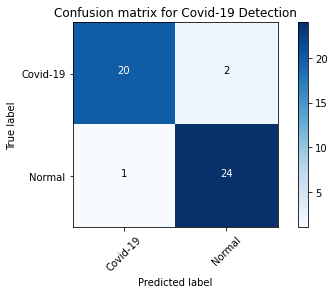

In [44]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection')


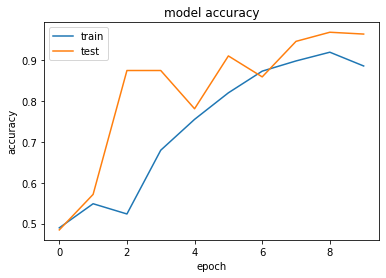

In [47]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


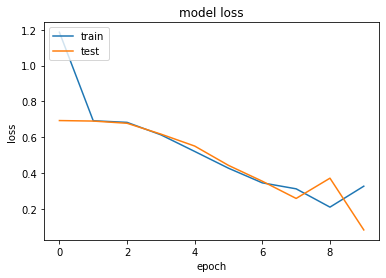

In [48]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
!wget 'https://raw.githubusercontent.com/hakantekgul/COVID-19_Classification/master/test_covid.jpeg'
!wget 'https://raw.githubusercontent.com/hakantekgul/COVID-19_Classification/master/test_no_covid.jpeg'

In [62]:
!wget 'https://raw.githubusercontent.com/hellorp1990/Covid-19-USF/master/external_covid_for%20testing/covid-19-pneumonia-28.png'

--2020-06-15 05:01:15--  https://raw.githubusercontent.com/hellorp1990/Covid-19-USF/master/external_covid_for%20testing/covid-19-pneumonia-28.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 533471 (521K) [image/png]
Saving to: ‘covid-19-pneumonia-28.png’

covid-19-pneumonia- 100%[===================>] 520.97K  --.-KB/s    in 0.07s   

2020-06-15 05:01:16 (7.53 MB/s) - ‘covid-19-pneumonia-28.png’ saved [533471/533471]



In [63]:
import numpy as np
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('/content/covid-19-pneumonia-28.png', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices
#print("This Xray Image is of positive covid-19 patient")
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

[[0]]
Prediction Of Our Model :  Positive For Covid-19
